Imports Bibs

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
from sklearn.preprocessing import scale, normalize
from scipy.stats import zscore #computes changes in terms of standard deviations
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import statsmodels.api as sm #sm.GLS(y,x) or sm.OLS(y,x)
import copy
from statsmodels.tsa.arima_model import ARMA
from scipy import stats
import copy

Import Data and get Overview

In [2]:
#read in data
data = pd.read_csv('r_ES50_d_cleaned_realized.csv', index_col='Date',  parse_dates=True)

In [3]:
data.shape

(5285, 44)

In [4]:
data.describe()

,ADS.DE,AI.PA,ALV.DE,ASML.AS,CS.PA,BBVA.MC,SAN.MC,BAS.DE,BAYN.DE,BMW.DE,...,SU.PA,SIE.DE,TEF.MC,FP.PA,URW.AS,UNA.AS,DG.PA,VIV.PA,VOW.DE,1/N
count,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,...,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000,5285.000000
mean,0.000601,0.000496,0.000052,0.000474,0.000260,-0.000094,-0.000050,0.000359,0.000201,0.000291,...,0.000370,0.000102,-0.000143,0.000323,0.000249,0.000390,0.000684,-0.000048,0.000252,0.000217
std,0.019164,0.015732,0.021632,0.028144,0.027866,0.021493,0.022108,0.018277,0.020366,0.020759,...,0.021010,0.023170,0.018501,0.017266,0.018114,0.014929,0.018943,0.021851,0.026014,0.013779
min,-0.166886,-0.118337,-0.166382,-0.233179,-0.203500,-0.176490,-0.221725,-0.146707,-0.194076,-0.141391,...,-0.228129,-0.428491,-0.175791,-0.181622,-0.243530,-0.107246,-0.187227,-0.294679,-0.256950,-0.145754
25%,-0.008512,-0.007434,-0.008681,-0.012210,-0.008052,-0.010500,-0.010468,-0.008615,-0.009396,-0.009818,...,-0.009874,-0.009588,-0.008579,-0.008325,-0.007711,-0.007052,-0.008318,-0.009014,-0.010261,-0.006017
50%,0.000000,0.000568,0.000353,0.000444,0.000000,0.000000,0.000000,0.000435,0.000000,0.000000,...,0.000468,0.000000,0.000000,0.000578,0.000271,0.000224,0.000135,0.000000,0.000000,0.000761
75%,0.009572,0.008415,0.009202,0.013080,0.008712,0.010152,0.010327,0.009386,0.010247,0.010228,...,0.010819,0.009700,0.008453,0.009003,0.008584,0.007798,0.009277,0.009075,0.011238,0.006722
max,0.162592,0.112783,0.233053,0.210160,0.192927,0.199073,0.208774,0.176407,0.330062,0.138356,...,0.151643,0.435903,0.164084,0.139762,0.167360,0.116166,0.182523,0.202723,0.902682,0.104980


In [5]:
data.columns

Index(['ADS.DE', 'AI.PA', 'ALV.DE', 'ASML.AS', 'CS.PA', 'BBVA.MC', 'SAN.MC',
       'BAS.DE', 'BAYN.DE', 'BMW.DE', 'BNP.PA', 'CRG.IR', 'SGO.PA', 'DAI.DE',
       'DTE.DE', 'ENEL.MI', 'ENGI.PA', 'ENI.MI', 'EOAN.DE', 'EL.PA', 'FRE.DE',
       'BN.PA', 'IBE.MC', 'INGA.AS', 'ISP.MI', 'OR.PA', 'MC.PA', 'MUV2.DE',
       'NOKIA.HE', 'ORA.PA', 'PHIA.AS', 'SAF.PA', 'SAN.PA', 'SAP.DE', 'SU.PA',
       'SIE.DE', 'TEF.MC', 'FP.PA', 'URW.AS', 'UNA.AS', 'DG.PA', 'VIV.PA',
       'VOW.DE', '1/N'],
      dtype='object')

<AxesSubplot:xlabel='Date'>

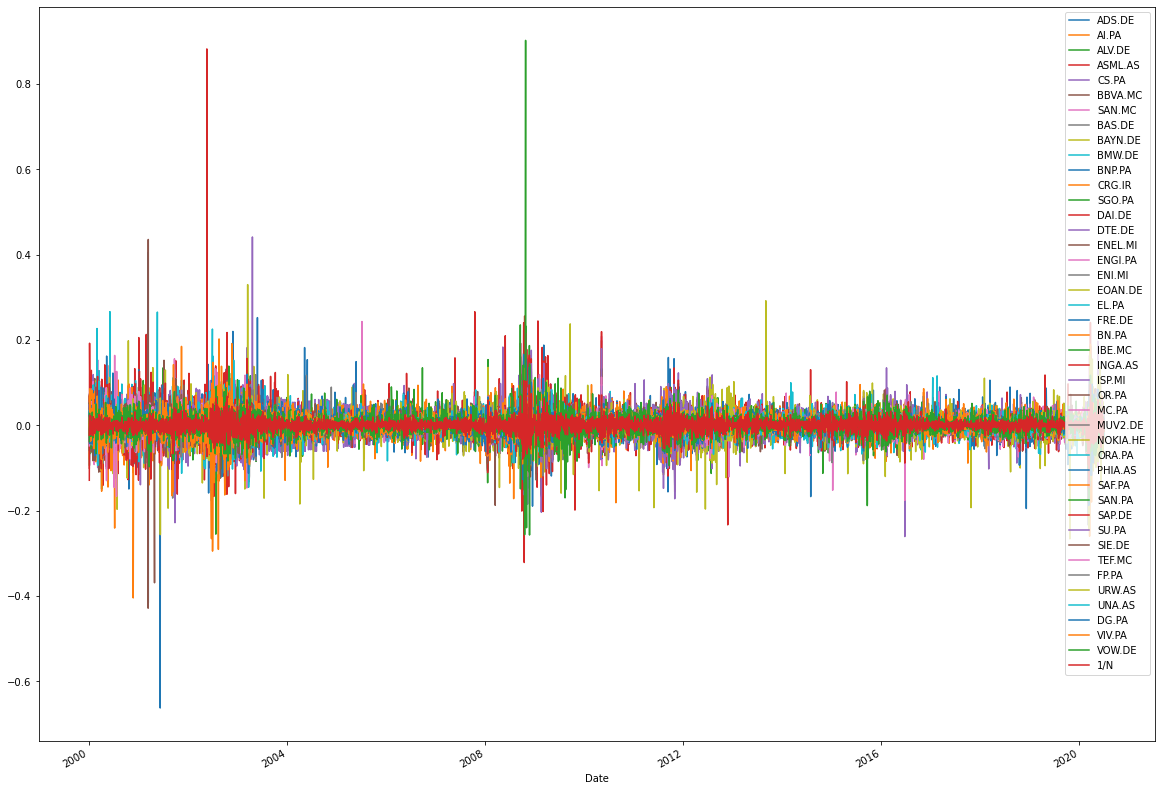

In [7]:
data.plot(figsize=(20,15))

Analytics: What am I going to do ? Why am I going to do it?

Analyse / Code

What did I find?